In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Récupération de tous nos compteurs


On récupère les infos de tous les compteurs


In [2]:
counters_response = requests.get(
    "https://portail-api-data.montpellier3m.fr/ecocounter?limit=1000"
)
print(counters_response.json())

[{'id': 'urn:ngsi-ld:EcoCounter:XTH19101158', 'type': 'EcoCounter', 'deviceType': {'type': 'Text', 'value': 'TrafficFlowObserved', 'metadata': {}}, 'intensity': {'type': 'Number', 'value': 2, 'metadata': {'TimeInstant': {'type': 'DateTime', 'value': '2025-11-27T04:00:00.000Z'}}}, 'laneId': {'type': 'Number', 'value': 188609530, 'metadata': {}}, 'location': {'type': 'geo:json', 'value': {'type': 'Point', 'coordinates': [43.61621, 3.874408]}, 'metadata': {}}, 'reversedLane': {'type': 'Boolean', 'value': False, 'metadata': {}}, 'vehicleType': {'type': 'Text', 'value': 'bicycle', 'metadata': {}}}, {'id': 'urn:ngsi-ld:EcoCounter:X2H22104775', 'type': 'EcoCounter', 'deviceType': {'type': 'Text', 'value': 'TrafficFlowObserved', 'metadata': {}}, 'intensity': {'type': 'Number', 'value': 0, 'metadata': {'TimeInstant': {'type': 'DateTime', 'value': '2025-11-27T03:00:00.000Z'}}}, 'laneId': {'type': 'Number', 'value': 8584788, 'metadata': {}}, 'location': {'type': 'geo:json', 'value': {'type': 'Poi

In [3]:
counters_df = pd.json_normalize(counters_response.json())
counters_df

,id,type,deviceType.type,deviceType.value,intensity.type,intensity.value,intensity.metadata.TimeInstant.type,intensity.metadata.TimeInstant.value,laneId.type,laneId.value,location.type,location.value.type,location.value.coordinates,reversedLane.type,reversedLane.value,vehicleType.type,vehicleType.value
0,urn:ngsi-ld:EcoCounter:XTH19101158,EcoCounter,Text,TrafficFlowObserved,Number,2,DateTime,2025-11-27T04:00:00.000Z,Number,1.886095e+08,geo:json,Point,"[43.61621, 3.874408]",Boolean,False,Text,bicycle
1,urn:ngsi-ld:EcoCounter:X2H22104775,EcoCounter,Text,TrafficFlowObserved,Number,0,DateTime,2025-11-27T03:00:00.000Z,Number,8.584788e+06,geo:json,Point,"[43.6001, 3.8776]",Boolean,False,Text,bicycle
2,urn:ngsi-ld:EcoCounter:X2H20042632,EcoCounter,Text,TrafficFlowObserved,Number,0,DateTime,2024-02-01T02:00:00.000Z,Number,9.770588e+07,geo:json,Point,"[43.5907, 3.81324]",Boolean,False,Text,bicycle
3,urn:ngsi-ld:EcoCounter:X2H20063164,EcoCounter,Text,TrafficFlowObserved,Number,0,DateTime,1899-11-30T08:00:00.000Z,Number,1.055755e+08,geo:json,Point,"[43.626698, 3.8956287]",Boolean,False,Text,bicycle
4,urn:ngsi-ld:EcoCounter:X2H19070220,EcoCounter,Text,TrafficFlowObserved,Number,10,DateTime,2025-11-26T23:00:00.000Z,Number,1.214036e+08,geo:json,Point,"[43.6097, 3.89694]",Boolean,False,Text,bicycle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,urn:ngsi-ld:EcoCounter:COM23120111,EcoCounter,Text,TrafficFlowObserved,Number,15,DateTime,2025-11-25T14:00:00.000Z,Number,1.182344e+09,geo:json,Point,"[43.597054, 3.8837419]",Boolean,False,Text,bicycle
69,urn:ngsi-ld:EcoCounter:COM23120110,EcoCounter,Text,TrafficFlowObserved,Number,2,DateTime,2025-11-25T14:00:00.000Z,Number,3.761892e+07,geo:json,Point,"[43.584312, 3.8610382]",Boolean,False,Text,bicycle
70,urn:ngsi-ld:EcoCounter:COM24010120,EcoCounter,Text,TrafficFlowObserved,Number,0,DateTime,2025-11-26T00:00:00.000Z,Number,3.651910e+08,geo:json,Point,"[43.538452, 3.870415]",Boolean,False,Text,bicycle
71,urn:ngsi-ld:EcoCounter:COM24010121,EcoCounter,Text,TrafficFlowObserved,Number,54,DateTime,2025-11-24T09:00:00.000Z,Number,3.685975e+08,geo:json,Point,"[43.630554, 3.869551]",Boolean,False,Text,bicycle


On juge la pertinence de nos colonnes


In [4]:
for column in counters_df.columns:
    print(counters_df[column].value_counts(), "\n")

id
urn:ngsi-ld:EcoCounter:XTH19101158        1
urn:ngsi-ld:EcoCounter:X2H21111121        1
urn:ngsi-ld:EcoCounter:ED223110497        1
urn:ngsi-ld:EcoCounter:ED223110501        1
urn:ngsi-ld:EcoCounter:867228050092989    1
                                         ..
urn:ngsi-ld:EcoCounter:X2H20042634        1
urn:ngsi-ld:EcoCounter:X2H22104767        1
urn:ngsi-ld:EcoCounter:X2H21111120        1
urn:ngsi-ld:EcoCounter:X2H22043034        1
urn:ngsi-ld:EcoCounter:COM24010119        1
Name: count, Length: 73, dtype: int64 

type
EcoCounter    73
Name: count, dtype: int64 

deviceType.type
Text    73
Name: count, dtype: int64 

deviceType.value
TrafficFlowObserved    73
Name: count, dtype: int64 

intensity.type
Number    73
Name: count, dtype: int64 

intensity.value
0     33
2      9
1      9
15     3
8      3
11     2
39     2
54     2
45     1
6      1
29     1
7      1
27     1
49     1
4      1
16     1
10     1
50     1
Name: count, dtype: int64 

intensity.metadata.TimeInstant.type

On conserve les colonnes pertinentes


In [5]:
counters_df = counters_df[["id", "location.value.coordinates"]]
counters_df = counters_df.rename(columns={"location.value.coordinates": "coordinates"})
counters_df

,id,coordinates
0,urn:ngsi-ld:EcoCounter:XTH19101158,"[43.61621, 3.874408]"
1,urn:ngsi-ld:EcoCounter:X2H22104775,"[43.6001, 3.8776]"
2,urn:ngsi-ld:EcoCounter:X2H20042632,"[43.5907, 3.81324]"
3,urn:ngsi-ld:EcoCounter:X2H20063164,"[43.626698, 3.8956287]"
4,urn:ngsi-ld:EcoCounter:X2H19070220,"[43.6097, 3.89694]"
...,...,...
68,urn:ngsi-ld:EcoCounter:COM23120111,"[43.597054, 3.8837419]"
69,urn:ngsi-ld:EcoCounter:COM23120110,"[43.584312, 3.8610382]"
70,urn:ngsi-ld:EcoCounter:COM24010120,"[43.538452, 3.870415]"
71,urn:ngsi-ld:EcoCounter:COM24010121,"[43.630554, 3.869551]"


In [6]:
for column in counters_df.columns:
    print(column, ":", counters_df[column].duplicated().sum())

id : 0
coordinates : 9


In [7]:
counters_df.loc[counters_df["coordinates"].duplicated(keep=False)].sort_values(
    by="coordinates"
)

,id,coordinates
62,urn:ngsi-ld:EcoCounter:X2H25023006,"[43.539352, 3.887153]"
6,urn:ngsi-ld:EcoCounter:X2H21070350,"[43.539352, 3.887153]"
2,urn:ngsi-ld:EcoCounter:X2H20042632,"[43.5907, 3.81324]"
58,urn:ngsi-ld:EcoCounter:X2H24042101,"[43.5907, 3.81324]"
44,urn:ngsi-ld:EcoCounter:X2H22104776,"[43.6001, 3.8776]"
1,urn:ngsi-ld:EcoCounter:X2H22104775,"[43.6001, 3.8776]"
30,urn:ngsi-ld:EcoCounter:X2H22104774,"[43.614, 3.8981]"
28,urn:ngsi-ld:EcoCounter:X2H22104773,"[43.614, 3.8981]"
18,urn:ngsi-ld:EcoCounter:X2H21070342,"[43.62387, 3.85339]"
40,urn:ngsi-ld:EcoCounter:X2H21070341,"[43.62387, 3.85339]"


In [8]:
counters_names_df = pd.read_csv("MMM_MMM_GeolocCompteurs.csv")
counters_names_df = counters_names_df[["Nom du com", "N° Série"]]
counters_names_df = counters_names_df.rename(
    columns={"Nom du com": "name", "N° Série": "id"}
)
counters_names_df["id"] = counters_names_df["id"].apply(
    lambda x: f"urn:ngsi-ld:EcoCounter:{x}"
)
counters_names_df.head()

,name,id
0,Compteur Vélo Tanneurs,urn:ngsi-ld:EcoCounter:XTH19101158
1,Compteur Piéton/Vélo Berracasa,urn:ngsi-ld:EcoCounter:X2H19070220
2,Compteur Vélo Lodève Celleneuve,urn:ngsi-ld:EcoCounter:Y2H20042633
3,Compteur Vélo Lavérune,urn:ngsi-ld:EcoCounter:X2H20042632
4,Compteur Vélo Vieille poste,urn:ngsi-ld:EcoCounter:ZLT25011699


## 2. Récupération des données d'intensité


In [9]:
response_data = []
for id in counters_df["id"]:
    response = requests.get(
        f"https://portail-api-data.montpellier3m.fr/ecocounter_timeseries/{id}/attrs/intensity?fromDate=2020-01-01T00%3A00%3A00&toDate=2025-11-27T00%3A00%3A00"
    )
    response_data.append(response.json())

In [10]:
id = [item.get("entityId", {}) for item in response_data]
datetime = [item.get("index") for item in response_data]
intensity = [item.get("values") for item in response_data]

In [11]:
dfs = []

for i in range(len(id)):
    temp_df = pd.DataFrame(
        {
            "id": id[i],
            "datetime": datetime[i],
            "intensity": intensity[i],
        }
    )
    if not temp_df.empty:
        dfs.append(temp_df)

df = pd.concat(dfs, ignore_index=True)
df

,id,datetime,intensity
0,urn:ngsi-ld:EcoCounter:XTH19101158,2023-01-01T00:00:00.000+00:00,13.0
1,urn:ngsi-ld:EcoCounter:XTH19101158,2023-01-01T01:00:00.000+00:00,10.0
2,urn:ngsi-ld:EcoCounter:XTH19101158,2023-01-01T02:00:00.000+00:00,11.0
3,urn:ngsi-ld:EcoCounter:XTH19101158,2023-01-01T03:00:00.000+00:00,17.0
4,urn:ngsi-ld:EcoCounter:XTH19101158,2023-01-01T04:00:00.000+00:00,32.0
...,...,...,...
641538,urn:ngsi-ld:EcoCounter:COM24010119,2025-11-19T22:00:00.000+00:00,1.0
641539,urn:ngsi-ld:EcoCounter:COM24010119,2025-11-19T22:00:00.000+00:00,1.0
641540,urn:ngsi-ld:EcoCounter:COM24010119,2025-11-19T22:00:00.000+00:00,1.0
641541,urn:ngsi-ld:EcoCounter:COM24010119,2025-11-19T22:00:00.000+00:00,1.0


In [12]:
df.duplicated().sum()

np.int64(106563)

In [13]:
df = df.drop_duplicates(ignore_index=True)
df

,id,datetime,intensity
0,urn:ngsi-ld:EcoCounter:XTH19101158,2023-01-01T00:00:00.000+00:00,13.0
1,urn:ngsi-ld:EcoCounter:XTH19101158,2023-01-01T01:00:00.000+00:00,10.0
2,urn:ngsi-ld:EcoCounter:XTH19101158,2023-01-01T02:00:00.000+00:00,11.0
3,urn:ngsi-ld:EcoCounter:XTH19101158,2023-01-01T03:00:00.000+00:00,17.0
4,urn:ngsi-ld:EcoCounter:XTH19101158,2023-01-01T04:00:00.000+00:00,32.0
...,...,...,...
534975,urn:ngsi-ld:EcoCounter:COM24010119,2025-11-19T18:00:00.000+00:00,6.0
534976,urn:ngsi-ld:EcoCounter:COM24010119,2025-11-19T19:00:00.000+00:00,2.0
534977,urn:ngsi-ld:EcoCounter:COM24010119,2025-11-19T20:00:00.000+00:00,1.0
534978,urn:ngsi-ld:EcoCounter:COM24010119,2025-11-19T21:00:00.000+00:00,0.0


In [14]:
df["datetime"] = pd.to_datetime(df["datetime"])
print(df.dtypes)

id                        object
datetime     datetime64[ns, UTC]
intensity                float64
dtype: object


/var/folders/xv/jd421qmx6dq83pc2svcylpzh0000gn/T/ipykernel_64858/1769372455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = pd.to_datetime(df["datetime"])


In [15]:
if "name" not in df.columns:
    df = pd.merge(df, counters_names_df, on="id")
    df = df[["id", "name", "datetime", "intensity"]]

In [16]:
df.describe()

,intensity
count,404592.000000
mean,22.260220
std,39.597107
min,0.000000
25%,1.000000
50%,7.000000
75%,25.000000
max,512.000000


In [17]:
df

,id,name,datetime,intensity
0,urn:ngsi-ld:EcoCounter:XTH19101158,Compteur Vélo Tanneurs,2023-01-01 00:00:00+00:00,13.0
1,urn:ngsi-ld:EcoCounter:XTH19101158,Compteur Vélo Tanneurs,2023-01-01 01:00:00+00:00,10.0
2,urn:ngsi-ld:EcoCounter:XTH19101158,Compteur Vélo Tanneurs,2023-01-01 02:00:00+00:00,11.0
3,urn:ngsi-ld:EcoCounter:XTH19101158,Compteur Vélo Tanneurs,2023-01-01 03:00:00+00:00,17.0
4,urn:ngsi-ld:EcoCounter:XTH19101158,Compteur Vélo Tanneurs,2023-01-01 04:00:00+00:00,32.0
...,...,...,...,...
404587,urn:ngsi-ld:EcoCounter:COM24010120,Compteur Villeneuve,2025-11-26 19:00:00+00:00,0.0
404588,urn:ngsi-ld:EcoCounter:COM24010120,Compteur Villeneuve,2025-11-26 20:00:00+00:00,0.0
404589,urn:ngsi-ld:EcoCounter:COM24010120,Compteur Villeneuve,2025-11-26 21:00:00+00:00,1.0
404590,urn:ngsi-ld:EcoCounter:COM24010120,Compteur Villeneuve,2025-11-26 22:00:00+00:00,0.0


In [18]:
df["hour"] = df["datetime"].dt.hour
df["day_of_week"] = df["datetime"].dt.day_of_week
df

,id,name,datetime,intensity,hour,day_of_week
0,urn:ngsi-ld:EcoCounter:XTH19101158,Compteur Vélo Tanneurs,2023-01-01 00:00:00+00:00,13.0,0,6
1,urn:ngsi-ld:EcoCounter:XTH19101158,Compteur Vélo Tanneurs,2023-01-01 01:00:00+00:00,10.0,1,6
2,urn:ngsi-ld:EcoCounter:XTH19101158,Compteur Vélo Tanneurs,2023-01-01 02:00:00+00:00,11.0,2,6
3,urn:ngsi-ld:EcoCounter:XTH19101158,Compteur Vélo Tanneurs,2023-01-01 03:00:00+00:00,17.0,3,6
4,urn:ngsi-ld:EcoCounter:XTH19101158,Compteur Vélo Tanneurs,2023-01-01 04:00:00+00:00,32.0,4,6
...,...,...,...,...,...,...
404587,urn:ngsi-ld:EcoCounter:COM24010120,Compteur Villeneuve,2025-11-26 19:00:00+00:00,0.0,19,2
404588,urn:ngsi-ld:EcoCounter:COM24010120,Compteur Villeneuve,2025-11-26 20:00:00+00:00,0.0,20,2
404589,urn:ngsi-ld:EcoCounter:COM24010120,Compteur Villeneuve,2025-11-26 21:00:00+00:00,1.0,21,2
404590,urn:ngsi-ld:EcoCounter:COM24010120,Compteur Villeneuve,2025-11-26 22:00:00+00:00,0.0,22,2


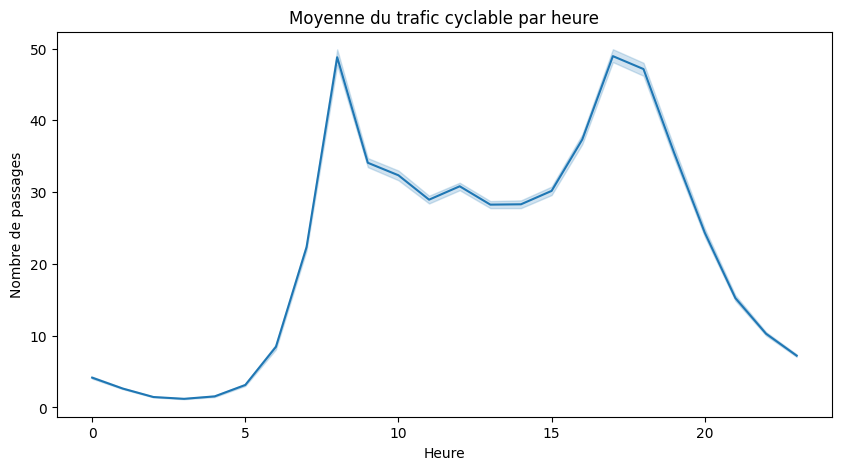

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot(df, x="hour", y="intensity")
plt.title("Moyenne du trafic cyclable par heure")
plt.xlabel("Heure")
plt.ylabel("Nombre de passages")
plt.show()

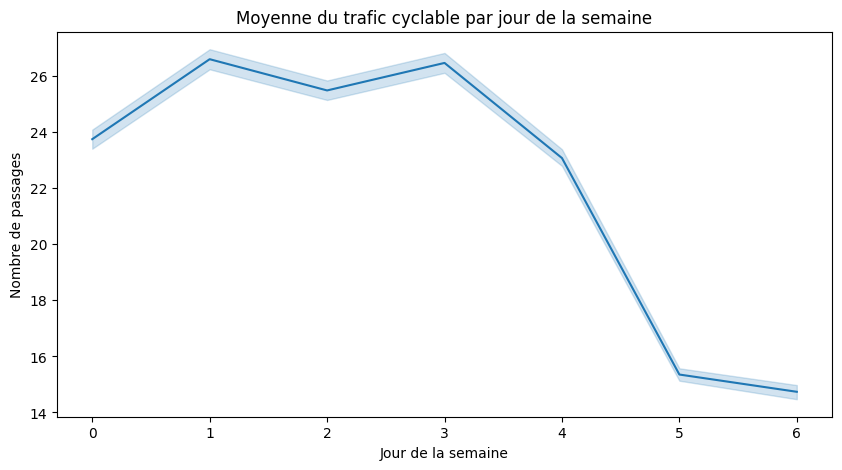

In [20]:
plt.figure(figsize=(10, 5))
sns.lineplot(df, x="day_of_week", y="intensity")
plt.title("Moyenne du trafic cyclable par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de passages")
plt.show()